In [168]:
path_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/"
path_results_antoine = "/Users/antoine/Documents/ENSAE2A/Codeperso/everything/Statappperso/Ressources/Results/"

Fonctions pour nettoyer les datas

In [3]:
import pandas as pd
import numpy as np

In [2]:
from Tool_Functions.cleaning_data import *
from Tool_Functions.join_data import *
from Tool_Functions.test_comportment_reabo import *
from Tool_Functions.visual import *
from Tool_Functions.comportment_reabo import *

In [14]:
def upload_clean(data_path):
    """
    Download clean files in your data_path
    There has to be the dirty files in your data_path
    """
    df = file_to_dataframe(data_path + "Correspondances_Promos.csv",";")
    df_Correspondances_Promos = change_dates_all(df,['DEBVAL', 'FINVAL', 'DEBABOMIN', 'DEBABOMAX'])
    save_to_csv_file(df_Correspondances_Promos,data_path + "df_Correspondances_Promos.csv")

    for i in range(1, 4, 1):
        df = file_to_dataframe(data_path + f"Donnees_Promos_202{i}.csv",",")
        df_Donnees_Promos_202i = clean_dates(df)
        save_to_csv_file(df_Donnees_Promos_202i, data_path + f"df_Donnees_Promos_202{i}.csv")

        df = file_to_dataframe(data_path + f"Donnees_Reabos_202{i}.csv",",")
        df_Donnees_Reabos_202i = clean_dates(df)
        save_to_csv_file(df_Donnees_Reabos_202i,data_path + f"df_Donnees_Reabos_202{i}.csv")

    return

def concat_all_years(data_path):
    """
    Create new csv files that concats the 3 years at once.
    """
    for name in ["df_Donnees_Promos_202", "df_Donnees_Reabos_202"]:
        df1 = file_to_dataframe(data_path + name + "1.csv",",")
        df2 = file_to_dataframe(data_path + name + "2.csv",",")
        df3 = file_to_dataframe(data_path + name + "3.csv",",")

        df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

        df.to_csv(data_path + name[:-4] + ".csv", index = True)


    return

upload_clean(path_antoine)
concat_all_years(path_antoine)

Partie sur les ODD 

In [11]:
def creation_df_odd(data_path, data_path_results):
    """
    This function creates the new df_odd on your Computer where all the ODD are presented and classified with their type
    """

    df_Correspondances_Promos = file_to_dataframe(data_path + "df_Correspondances_Promos.csv",",") 

    df_odd = df_filter_condition(df_Correspondances_Promos,'TYPE_PROMO','ODD') #we create a DataFrame with only ODD Promotion
    df_odd['TYPE_PROMON'] = create_new_column(df_odd,apply_conditions) #we create new columns on this DataFrame of the ODD type


    for i in [1, 2, 3]:
    #creation df_odd_202i pour chaque année
        df_Donnees_Promos_202i = file_to_dataframe(data_path + f"df_Donnees_Promos_202{i}.csv",",")

        n = df_Donnees_Promos_202i.shape[0] / 10000 #number minimum of used
        df_new_odd = keep_used_odd(df_Donnees_Promos_202i,df_odd,n) #creation of the new tab by keeping only the used promos
        
        save_to_csv_file(df_new_odd,data_path_results + f"odd_202{i}.csv")
    
    #idem sur les trois années
    df_Donnees_Promos = file_to_dataframe(data_path + "df_Donnees_Promos.csv",",")

    n = df_Donnees_Promos.shape[0] / 10000 #number minimum of used
    df_new_odd = keep_used_odd(df_Donnees_Promos,df_odd,n) #creation of the new tab by keeping only the used promos
    
    save_to_csv_file(df_new_odd,data_path_results + f"odd.csv")

    return True


#Intermediary step we change the df_Données_Promos by adding a column 'TYPE_PROMON' for being easier to understand instead of 'CPROMO'

def create_df_Données_Promos_odd(data_path, data_path_results):


    for i in [1, 2, 3]:
        #année i
        df_Donnees_Promos_202i = file_to_dataframe(data_path + f"df_Donnees_Promos_202{i}.csv",",")
        df_odd = file_to_dataframe(data_path + f"odd_202{i}.csv", ",")
        df_Donnees_Promos_202i_odd = join_dataFrames(df_Donnees_Promos_202i,df_odd[['CPROMO','TYPE_PROMON']] ,'CPROMO') #We create a new column 'TYPE_PROMON' on df_Données_Promos_202i
        save_to_csv_file(df_Donnees_Promos_202i_odd,data_path_results + f"df_Donnees_Promos_202{i}_odd.csv") #we save it on your Mac

    return True

def create_df_Données_Promos_odd_all(data_path, data_path_results):
    """
    This function create df_Données_Promos_odd for the dataFrame with all years
    """
    
    df_Donnees_Promos = file_to_dataframe(data_path + "df_Donnees_Promos.csv",",")
    df_odd = file_to_dataframe(data_path + "odd.csv", ",")
    df_Donnees_Promos_odd = join_dataFrames(df_Donnees_Promos,df_odd[['CPROMO','TYPE_PROMON']] ,'CPROMO') #We create a new column 'TYPE_PROMON' on df_Données_Promos_202i
    save_to_csv_file(df_Donnees_Promos_odd,data_path_results + "df_Donnees_Promos_odd.csv") #we save it on your Mac
    
    return True

#Intermediary step we create df_Données_Réabos_odd where there are all the Reabos which corresponds to a reabo

def create_df_Données_Reabos_odd_all(data_path, data_path_results):
    """
    This function create df_Données_Reabos_odd with all years of Reabos which corresponds to a use of Promo
    and then we drop some unused column
    """
    df_Donnees_Promos_odd = file_to_dataframe(data_path +"df_Donnees_Promos_odd.csv" )
    df_Donnees_Reabos = file_to_dataframe(data_path + "df_Donnees_Reabos.csv")
    df_Donnees_Reabos_odd = join_dataFrames(df_Donnees_Promos_odd,df_Donnees_Reabos,['ID_ABONNE','DATE_ACTE_REEL'])

    df_Donnees_Reabos_odd = df_Donnees_Reabos_odd.drop(columns = ["REABO_APRES_ECHEANCE","CPROMO","SECTEUR","PAYS","NUMDIST_PARTENAIRE","NOM_PARTENAIRE","NUMDIST_POINT_DE_VENTE","NOM_POINT_DE_VENTE"])

    end_abo = 'DATE_FIN_ABO_PREC'
    date_reabo = 'DATE_ACTE_REEL'

    df_Donnees_Reabos_odd = time_reabo_columns(df_Donnees_Reabos_odd,end_abo,date_reabo)
    
    save_to_csv_file(df_Donnees_Reabos_odd,data_path_results + "df_Donnees_Reabos_odd.csv")

    return True

creation_df_odd(path_antoine,path_results_antoine)
create_df_Données_Promos_odd(path_antoine, path_results_antoine)
create_df_Données_Promos_odd_all(path_antoine,path_results_antoine)
create_df_Données_Reabos_odd_all(path_antoine,path_results_antoine)

Pourcentages

In [14]:
def repartition_reabo_cond(data_path, data_path_results, action = ['write']):
    """
    This function is used to provide some statistics on the reabo habits.
    action is a list of the actions we need to do.
    """

    df_Donnees_Promos_odd = file_to_dataframe(data_path + "df_Donnees_Promos_odd.csv") #We open the df_Données_Promos_2021_odd where TYPEPROMO <-> CPROMO
    df_Donnees_Reabos = file_to_dataframe(data_path + "df_Donnees_Reabos.csv")
    df_join = join_dataFrames(df_Donnees_Promos_odd,df_Donnees_Reabos,['ID_ABONNE','DATE_ACTE_REEL']) #We join the tables

    df_join = df_mois_annee(df_join,'DATE_ACTE_REEL')

    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_promo = count_abo_conditions(df_join,['TYPE_PROMON'],'ID_ABONNE')
    df_type_promo_canaldistrib = count_abo_conditions(df_join,['TYPE_PROMON', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_month_canaldistrib = count_abo_conditions(df_join,['MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_canaldistrib = count_abo_conditions(df_join,['TYPE_PROMON','MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'REGION'],'ID_ABONNE')
    df_repartition_secteur = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'SECTEUR'],'ID_ABONNE')
    df_repartition_enseigne = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = count_abo_conditions(df_join,['TYPE_PROMON','MONTH','YEAR', 'FORMULE_PREC'],'ID_ABONNE')
    
    nouns = ["df_repartition_promo.csv", "type_promo_canaldistrib.csv", "month_canaldistrib.csv", "repartition_canaldistrib.csv", "repartition_region.csv", "repartition_secteur.csv", "repartition_enseigne.csv", "repartition_moypay.csv", "repartition_formule.csv"]
    with open(data_path_results + 'Files_names.txt', "w") as file:
        for element in nouns:
            file.write(f"{element}\n")

    if 'write' in action:
        save_to_csv_file(df_repartition_promo,data_path_results + "df_repartition_promo.csv")
        save_to_csv_file(df_type_promo_canaldistrib,data_path_results + "type_promo_canaldistrib.csv")
        save_to_csv_file(df_month_canaldistrib,data_path_results + "month_canaldistrib.csv")
        save_to_csv_file(df_repartition_canaldistrib,data_path_results + "repartition_canaldistrib.csv")
        save_to_csv_file(df_repartition_region,data_path_results + "repartition_region.csv")
        save_to_csv_file(df_repartition_secteur,data_path_results + "repartition_secteur.csv")
        save_to_csv_file(df_repartition_enseigne,data_path_results + "repartition_enseigne.csv")
        save_to_csv_file(df_repartition_moypay,data_path_results + "repartition_moypay.csv")
        save_to_csv_file(df_repartition_formule,data_path_results + "repartition_formule.csv")

    return True


In [15]:
repartition_reabo_cond(path_antoine, path_results_antoine, action = ['write'])

True

In [26]:
def stats_percentage_one_cond(data_path,data_path_results):
    
    #open_new df_données_Reabos_odd
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_promo = percent_abo_conditions(df_join,['TYPE_PROMON'],'ID_ABONNE')
    df_repartition_canaldistrib = percent_abo_conditions(df_join,['CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = percent_abo_conditions(df_join,['REGION'],'ID_ABONNE')
    df_repartition_enseigne = percent_abo_conditions(df_join,['ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = percent_abo_conditions(df_join,['MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = percent_abo_conditions(df_join,['FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_repartition_promo,data_path_results + "repartition_promo_%.csv")
    save_to_csv_file(df_repartition_canaldistrib,data_path_results + "repartition_canaldistrib_%.csv")
    save_to_csv_file(df_repartition_region,data_path_results + "repartition_region_%.csv")
    save_to_csv_file(df_repartition_enseigne,data_path_results + "repartition_enseigne_%.csv")
    save_to_csv_file(df_repartition_moypay,data_path_results + "repartition_moypay_%.csv")
    save_to_csv_file(df_repartition_formule,data_path_results + "repartition_formule_%.csv")
    
    return True

In [17]:
stats_percentage_one_cond(path_antoine,path_results_antoine)

True

In [19]:
def stats_percentage_multiple_conds(data_path,data_path_results):
    
    #open_new df_données_Reabos_odd
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    
    #We compute some statistcs using count_abo_conditions : this functions count the number of an occurence where the datas are group by conditions 
    df_repartition_canaldistrib = percent_abo_conditions_group(df_join,['TYPE_PROMON','CANAL_DISTRIB'],'ID_ABONNE')
    df_repartition_region = percent_abo_conditions_group(df_join,['TYPE_PROMON','REGION'],'ID_ABONNE')
    df_repartition_enseigne = percent_abo_conditions_group(df_join,['TYPE_PROMON','ENSEIGNE'],'ID_ABONNE')
    df_repartition_moypay = percent_abo_conditions_group(df_join,['TYPE_PROMON','MOYEN_PAIEMENT'],'ID_ABONNE')
    df_repartition_formule = percent_abo_conditions_group(df_join,['TYPE_PROMON','FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_repartition_canaldistrib,data_path_results + "promo_" + "repartition_canaldistrib.csv")
    save_to_csv_file(df_repartition_region,data_path_results +  "promo_" +"repartition_region.csv")
    save_to_csv_file(df_repartition_enseigne,data_path_results + "promo_" + "repartition_enseigne.csv")
    save_to_csv_file(df_repartition_moypay,data_path_results  + "promo_"+ "repartition_moypay.csv")
    save_to_csv_file(df_repartition_formule,data_path_results + "promo_" + "repartition_formule_prec.csv")
    
    return True

In [20]:
stats_percentage_multiple_conds(path_antoine,path_results_antoine)

True

In [32]:
def one_cond_compare_months_years(data_path, data_path_results):

    "Compare les utilisations d'un type au cours des mois et des années, indépendamment des promos"
    
    df_join = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")
    df_join = df_mois_annee(df_join,'DATE_ACTE_REEL')

    df_month_canaldistrib = count_abo_conditions(df_join,['MONTH', 'YEAR', 'CANAL_DISTRIB'],'ID_ABONNE')
    df_month_promo = count_abo_conditions(df_join,['MONTH', 'YEAR', 'TYPE_PROMON'],'ID_ABONNE')
    df_month_region = count_abo_conditions(df_join,['MONTH', 'YEAR', 'REGION'],'ID_ABONNE')
    df_month_enseigne = count_abo_conditions(df_join,['MONTH', 'YEAR', 'ENSEIGNE'],'ID_ABONNE')
    df_month_moypay = count_abo_conditions(df_join,['MONTH', 'YEAR', 'MOYEN_PAIEMENT'],'ID_ABONNE')
    df_month_formule = count_abo_conditions(df_join,['MONTH', 'YEAR', 'FORMULE_PREC'],'ID_ABONNE')

    save_to_csv_file(df_month_canaldistrib,data_path_results + "month_canaldistrib.csv")
    save_to_csv_file(df_month_promo,data_path_results + "month_promo.csv")
    save_to_csv_file(df_month_region,data_path_results + "month_region.csv")
    save_to_csv_file(df_month_enseigne,data_path_results + "month_enseigne.csv")
    save_to_csv_file(df_month_moypay,data_path_results + "month_moypay.csv")
    save_to_csv_file(df_month_formule,data_path_results + "month_formule.csv") 

    return True

In [33]:
one_cond_compare_months_years(path_antoine, path_results_antoine)

True

In [71]:
def repartition_time_reabo(data_path,data_path_results):
    """
    Create a data frame where the reabo are classed by time_reabo
    
    """
    df = file_to_dataframe(data_path + "df_Donnees_Reabos_odd.csv")

    df_repartition_time_reabo = percent_abo_conditions(df,'DELAI_REABO','ID_ABONNE')
    save_to_csv_file(df_repartition_time_reabo,data_path_results + "repartition_time_reabo.csv")

    return True


In [72]:
repartition_time_reabo(path_antoine,path_results_antoine)

True

In [153]:
def repartition_reabo(data_path, data_path_results):
    """
    This function is used to compute the time of reabo for each type
    """

    df_Données_Promos_2021 = file_to_dataframe(data_path + "df_Donnees_Promos_odd.csv",",")
    df_Données_Reabos_2021 = file_to_dataframe(data_path + "df_Donnees_Reabos.csv",",")

    end_abo = 'DATE_FIN_ABO_PREC'
    # Ici il y avait "DATE_FIN_ABO_PREC" mais j'ai l'impression que la variable s'appelle plutot "DATE_FIN_REABO"
    date_reabo = 'DATE_ACTE_REEL'

    df_Données_Reabos_2021 = time_reabo_columns(df_Données_Reabos_2021,end_abo,date_reabo) #Creation new colum "TIME_REABO"

    df_Données_Promos_2021 = str_to_date(df_Données_Promos_2021,'DATE_ACTE_REEL') #Preparation join df_Données_Promos_2021 et df_Données_Reabos_2021
    df_join = join_dataFrames(df_Données_Promos_2021,df_Données_Reabos_2021,['ID_ABONNE','DATE_ACTE_REEL']) #Join df_Données_Promos_2021 et df_Données_Reabos_2021

    df_mean_time_reabo_promos = mean_time_reabo(df_join,'TYPE_PROMON','DELAI_REABO')  
    save_to_csv_file(df_mean_time_reabo_promos,data_path_results + "df_mean_time_reabo_promos.csv") # Save on My Mac

    df_join = join_dataFrames_outer(df_Données_Promos_2021,df_Données_Reabos_2021,['ID_ABONNE','DATE_ACTE_REEL']) 
    df_mean_empty = mean_empty_col(df_join,'CPROMO','DELAI_REABO')
    save_to_csv_file(df_mean_empty,data_path_results + "df_mean_empty.csv") # Save on My Mac


    return True


In [154]:
repartition_reabo(path_antoine, path_results_antoine)

True

12 mois glissants

c la hess

In [42]:
from datetime import timedelta


Graphiques

## **1 / Répartition globale de l'utilisation des services**

In [119]:
def create_distribution_plot(df, title, label = 0, value = 1, number = True):
    """
    Creates a repartition graph
    Label is the number of the label column, value the number of the value column.
    Number is True if I want to select the columns by their number 
    or False if I want to select them by their label.
    """
    plt.figure()
    if number:
        plt.bar(df.iloc[:, label], df.iloc[:, value])
    else:
        plt.bar(df[label], df[value])
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes et alignement à droite
    plt.tight_layout()
    return


In [171]:
def rep_globale(data_path):
    df = file_to_dataframe(data_path + "repartition_canaldistrib_%.csv", ',')
    df1 = file_to_dataframe(data_path + "repartition_enseigne_%.csv", ',')
    df2 = file_to_dataframe(data_path + "repartition_formule_%.csv", ',')
    df3 = file_to_dataframe(data_path + "repartition_moypay_%.csv", ',')
    df4 = file_to_dataframe(data_path + "repartition_promo_%.csv", ',')
    df5 = file_to_dataframe(data_path + "repartition_region_%.csv", ',')

    create_distribution_plot(df4, title= 'Répartiton totale promo', label = 0, value = 1, number = True)
    create_distribution_plot(df, title= 'Répartiton totale canal', label = 0, value = 1, number = True)
    create_distribution_plot(df1, title= 'Répartiton totale enseigne', label = 0, value = 1, number = True)
    create_distribution_plot(df2, title= 'Répartiton totale formule prec', label = 0, value = 1, number = True)
    create_distribution_plot(df3, title= 'Répartiton totale moypay', label = 0, value = 1, number = True)
    create_distribution_plot(df5, title= 'Répartiton totale region', label = 0, value = 1, number = True)

    return True

True

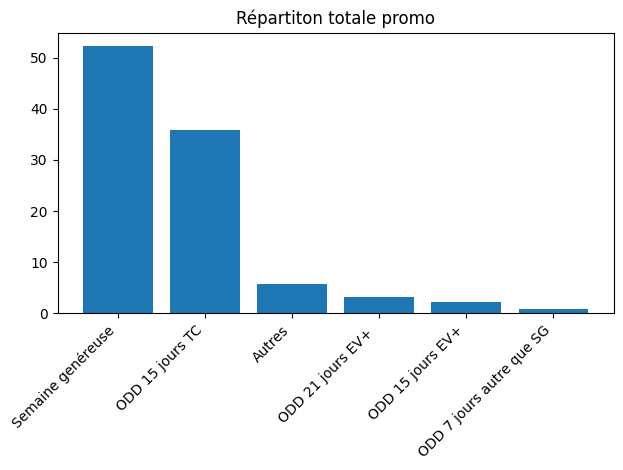

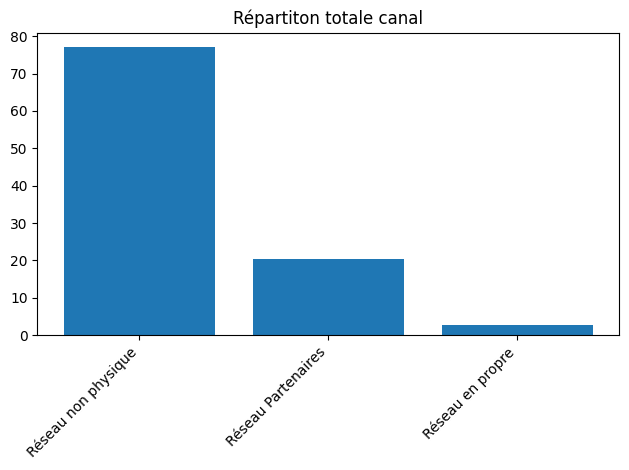

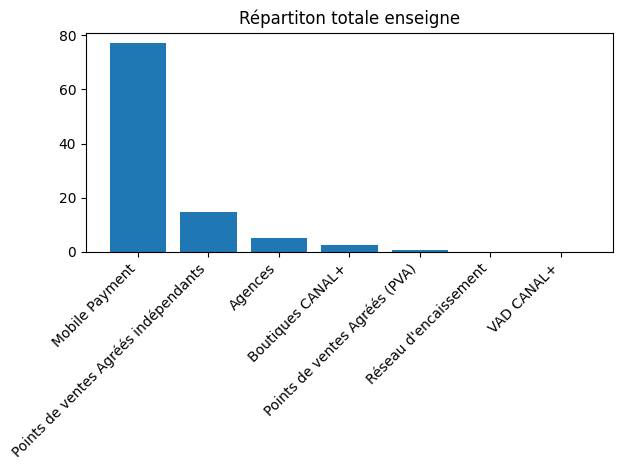

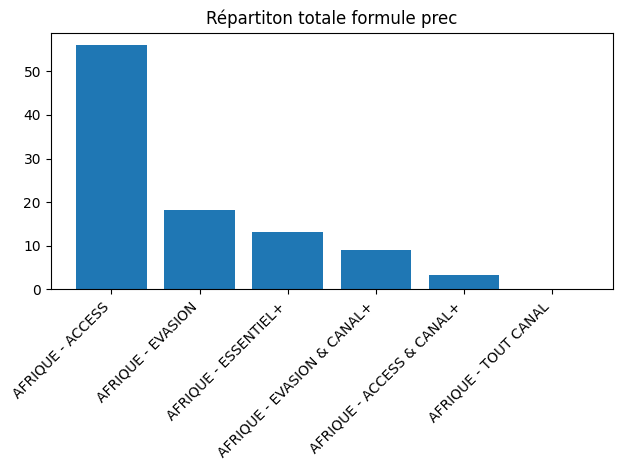

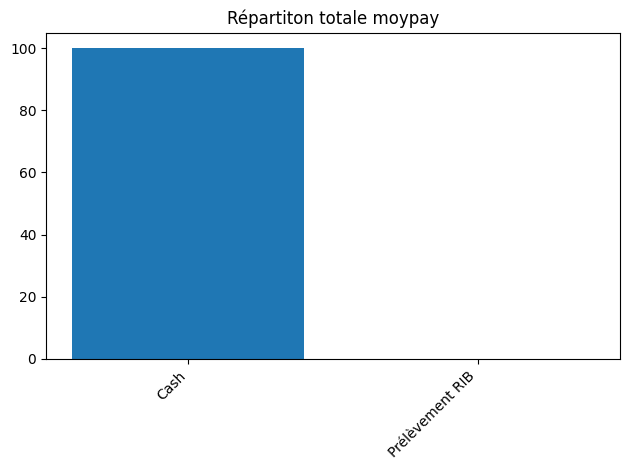

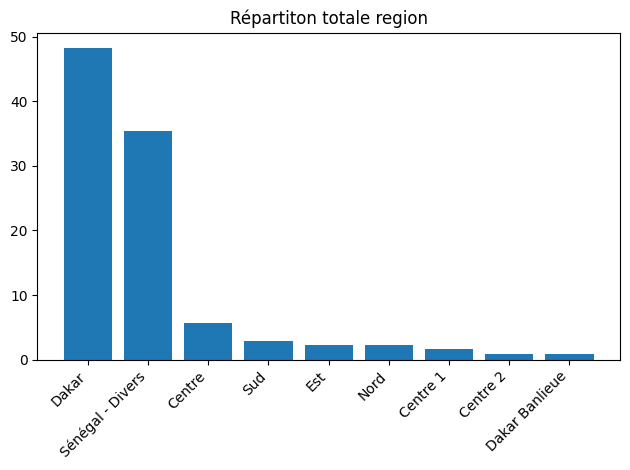

In [172]:
rep_globale(path_results_antoine)

## **2 / Répartition des services par type de promo**

In [121]:
def graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'DATE'):
    """
    Crée un graph à travers through de la quantité value
    et montre sa répartition selon repartion.
    """
    if through == 'DATE':
        # Convertir MONTH et YEAR en datetime pour faciliter la manipulation du temps
        #df['DATE'] = pd.to_datetime(str(df['MONTH']) + ' ' + str(df['YEAR']).astype(str))
        #df['DATE'] = pd.to_datetime(df['MONTH'].astype(str).str.cat(df['YEAR'].astype(str), sep=' '))
        df['DATE'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str), format='%m-%Y')
        #df['DATE'] = df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str).str[-2:]
        #df = df.sort_values(by='DATE')
        df['DATE'] = df['DATE'].dt.to_period('M')
        df['DATE'] = df['DATE'].dt.strftime('%y')
        df = df.sort_values(by='DATE')


    # Créer une figure avec deux sous-graphiques
    fig, ax = plt.subplots(1,1, figsize=(10, 8))

    sns.barplot(x=through, y=value, hue=repartition, data=df, palette='muted')
    ax.set_title('Répartition de ' + value + ' par ' + repartition + ' selon ' + through)
    ax.legend(title=repartition)
       
    plt.xticks(rotation=45, ha='right') 

    return


In [177]:
def rep_services_promo(data_path):
    df = file_to_dataframe(data_path + "promo_" + "repartition_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path + "promo_" + "repartition_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "promo_" +"repartition_formule_prec.csv", ',')
    df3 = file_to_dataframe(data_path + "promo_" +"repartition_moypay.csv", ',')
    df4 = file_to_dataframe(data_path + "promo_" +"repartition_region.csv", ',')

    graph_repartition(df, value = 'Percentage_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'TYPE_PROMON')
    graph_repartition(df1, value = 'Percentage_ID_ABONNE', repartition = 'ENSEIGNE', through = 'TYPE_PROMON')
    graph_repartition(df2, value = 'Percentage_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'TYPE_PROMON')
    graph_repartition(df3, value = 'Percentage_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'TYPE_PROMON')
    graph_repartition(df4, value = 'Percentage_ID_ABONNE', repartition = 'REGION', through = 'TYPE_PROMON')

    return True

True

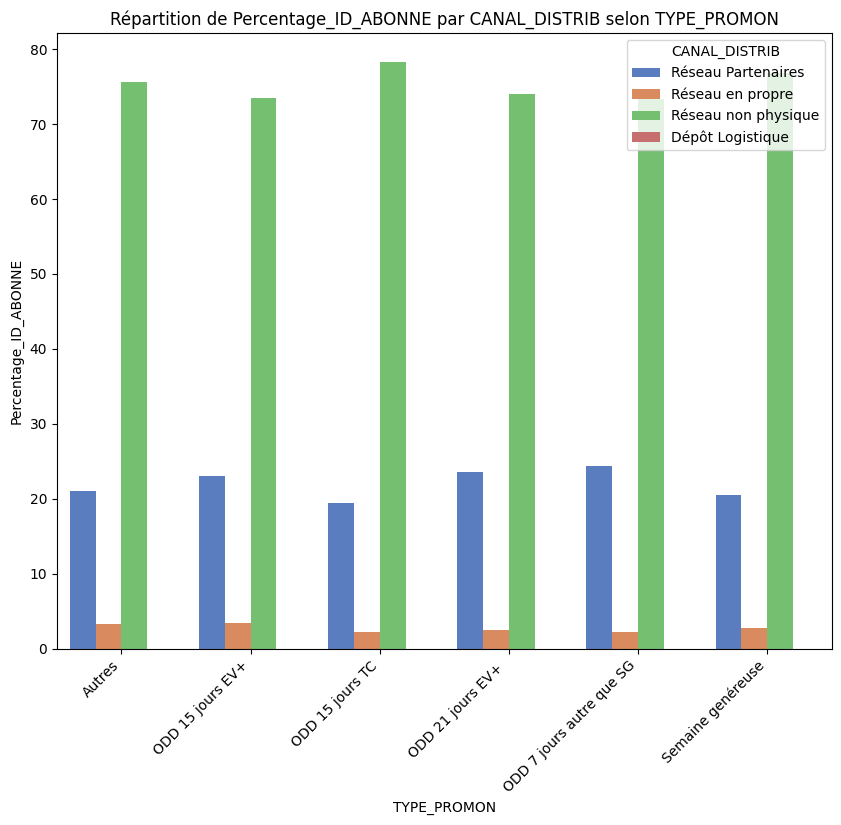

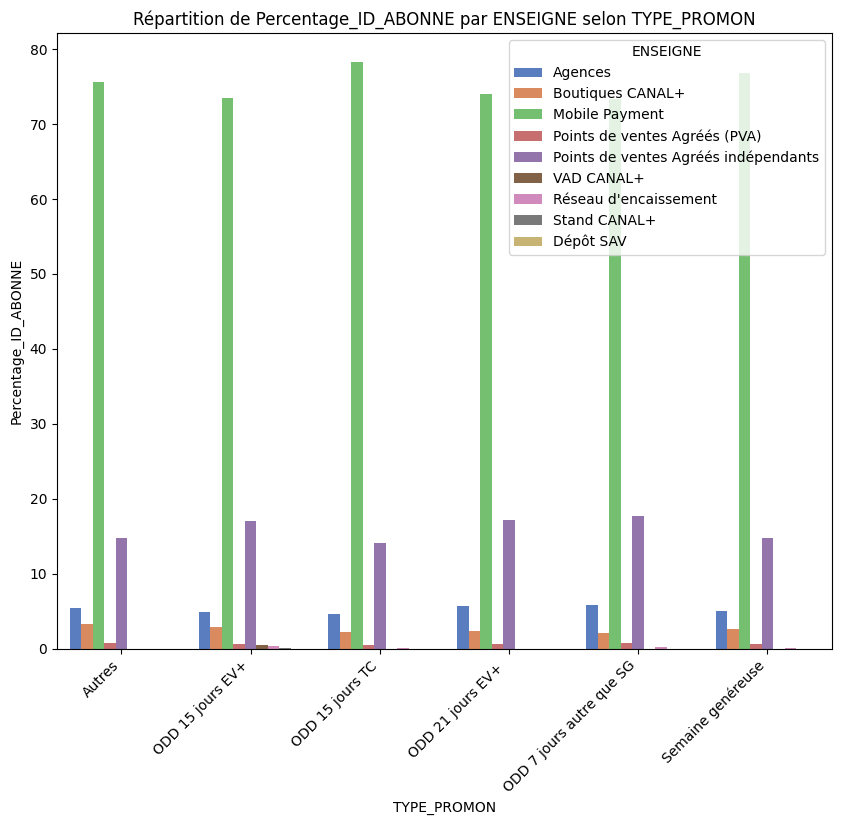

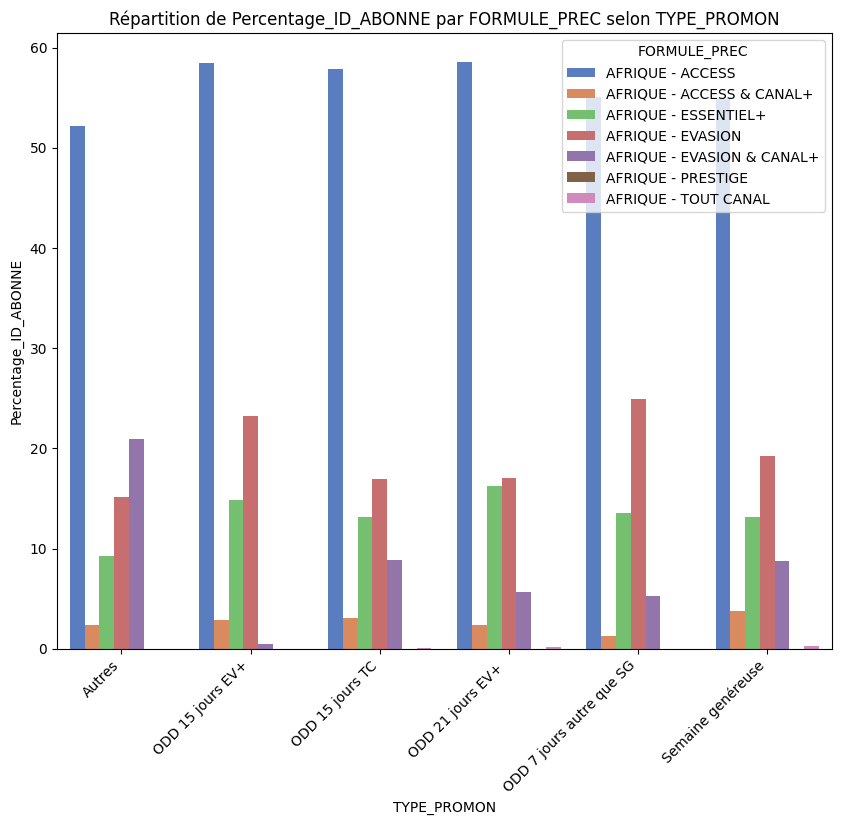

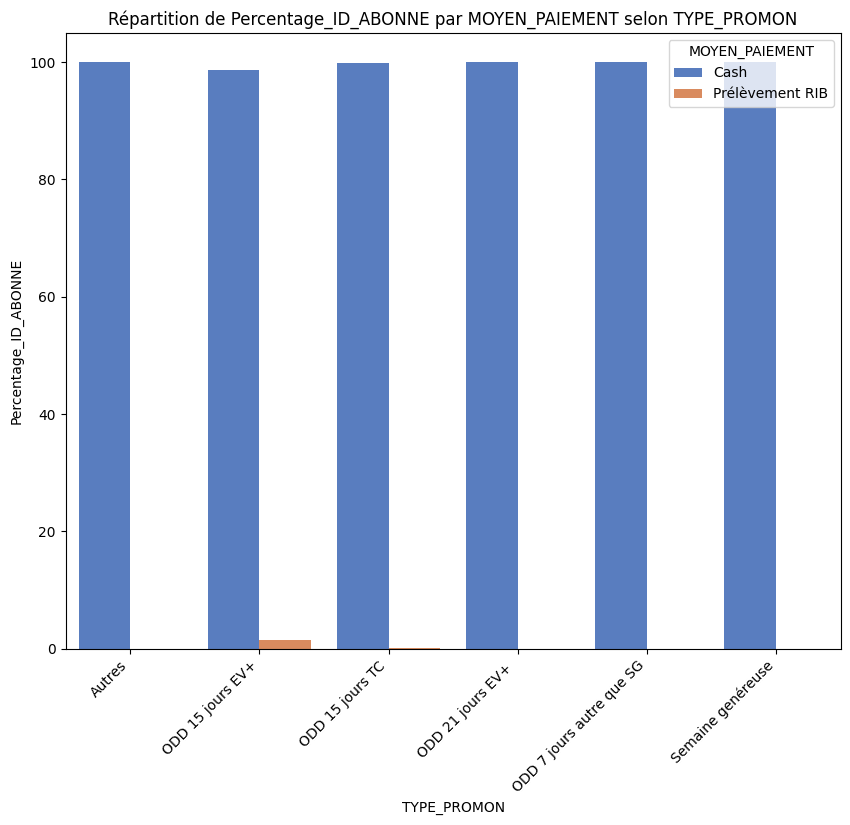

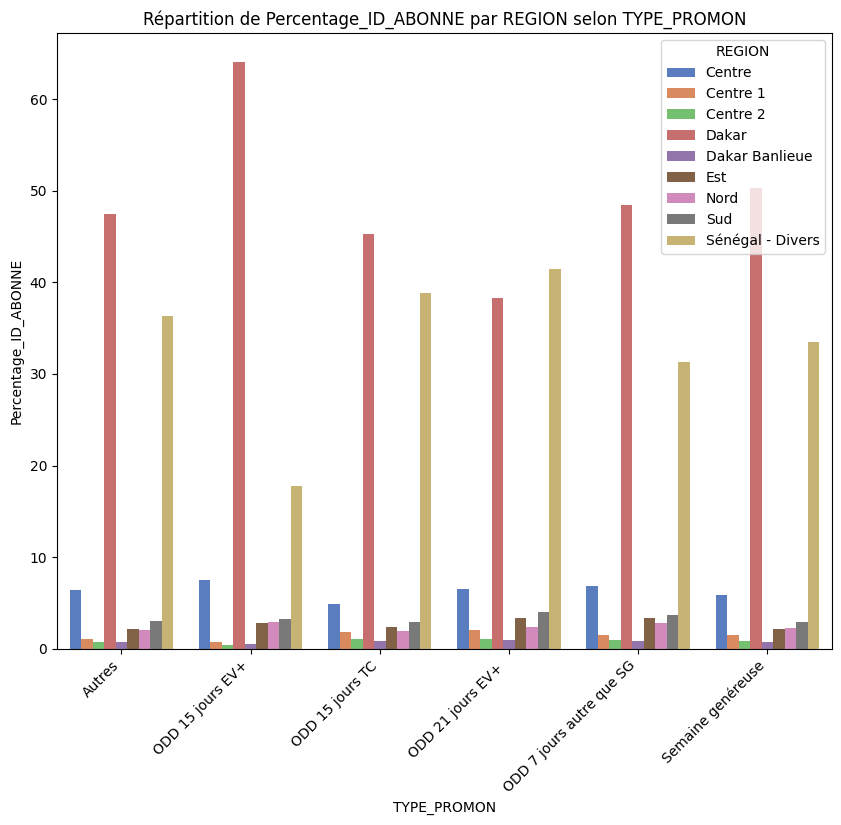

In [178]:
rep_services_promo(path_results_antoine)

## **3 / Evolution de l'utilisation des services au cours du temps**

DIfférences entre années

In [179]:
def rep_evo_secteurs_year(data_path):
    df = file_to_dataframe(data_path + "month_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path  + "month_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "month_formule.csv", ',')
    df3 = file_to_dataframe(data_path  + "month_moypay.csv", ',')
    df4 = file_to_dataframe(data_path  + "month_region.csv", ',')

    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'YEAR')
    graph_repartition(df1, value = 'NB_ID_ABONNE', repartition = 'ENSEIGNE', through = 'YEAR')
    graph_repartition(df2, value = 'NB_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'YEAR')
    graph_repartition(df3, value = 'NB_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'YEAR')
    graph_repartition(df4, value = 'NB_ID_ABONNE', repartition = 'REGION', through = 'YEAR')

    return True

True

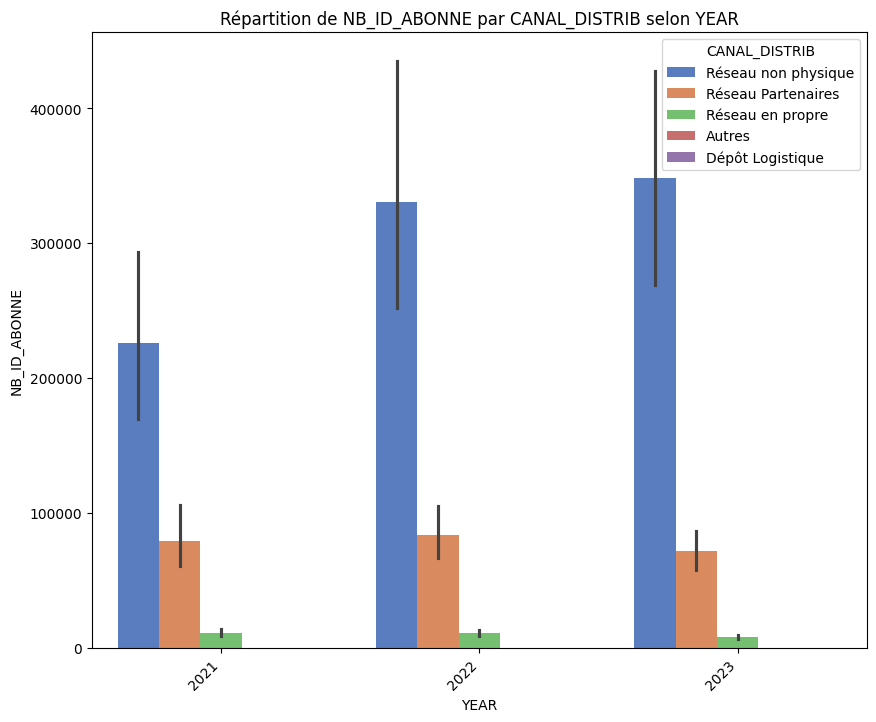

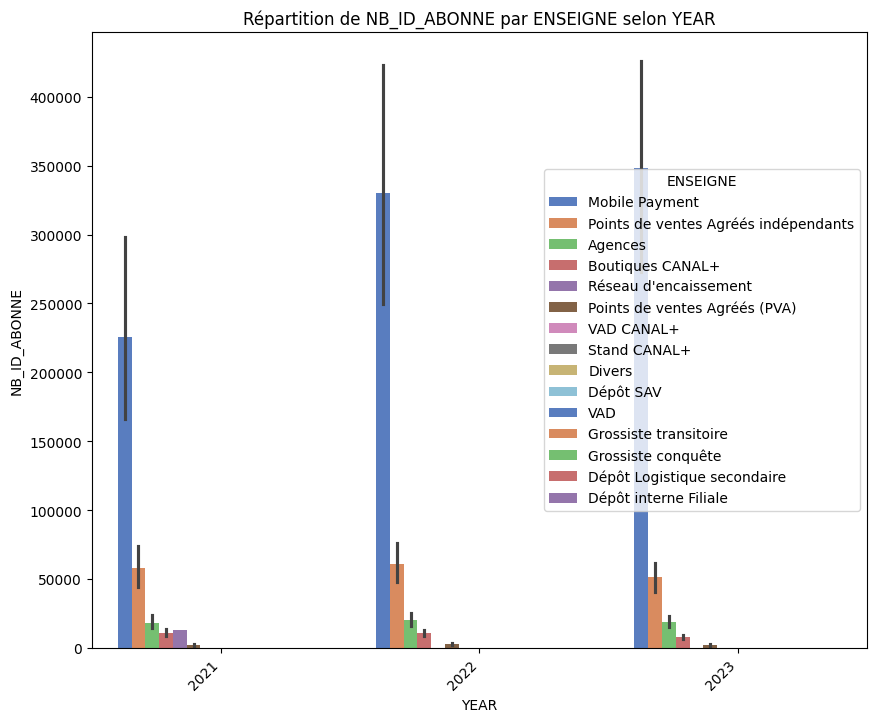

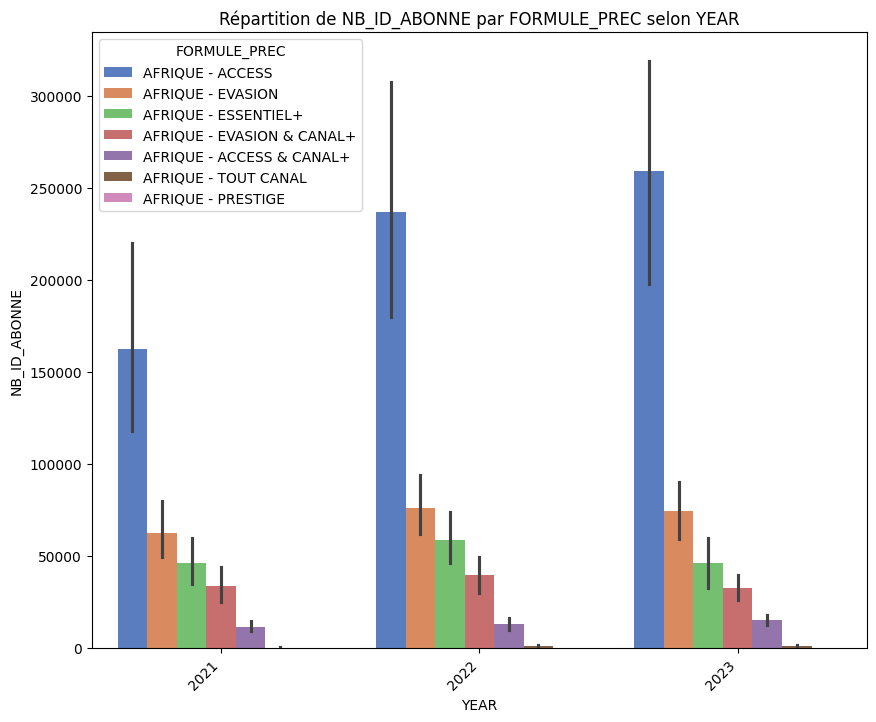

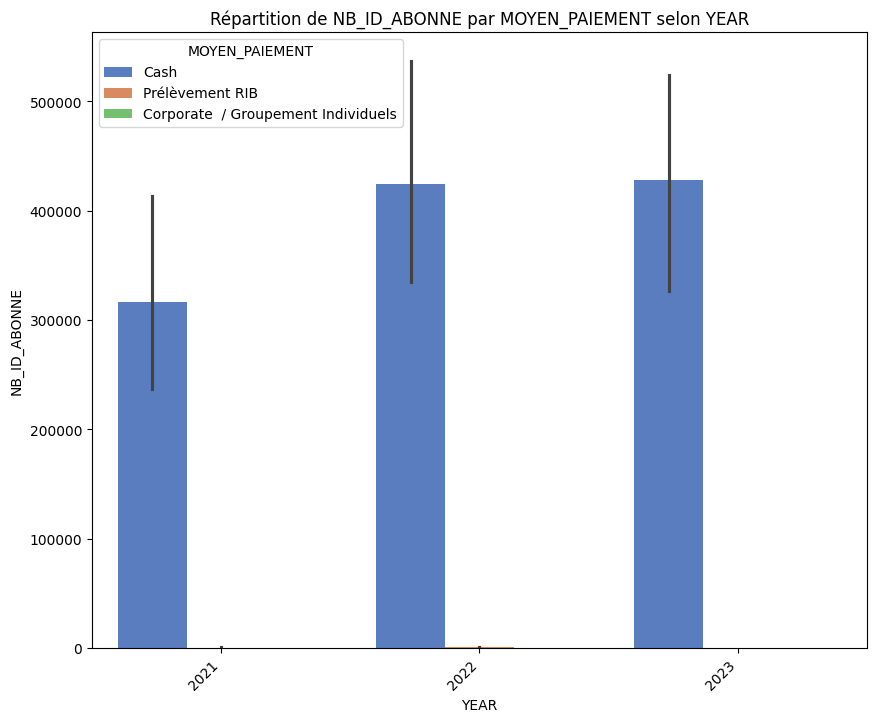

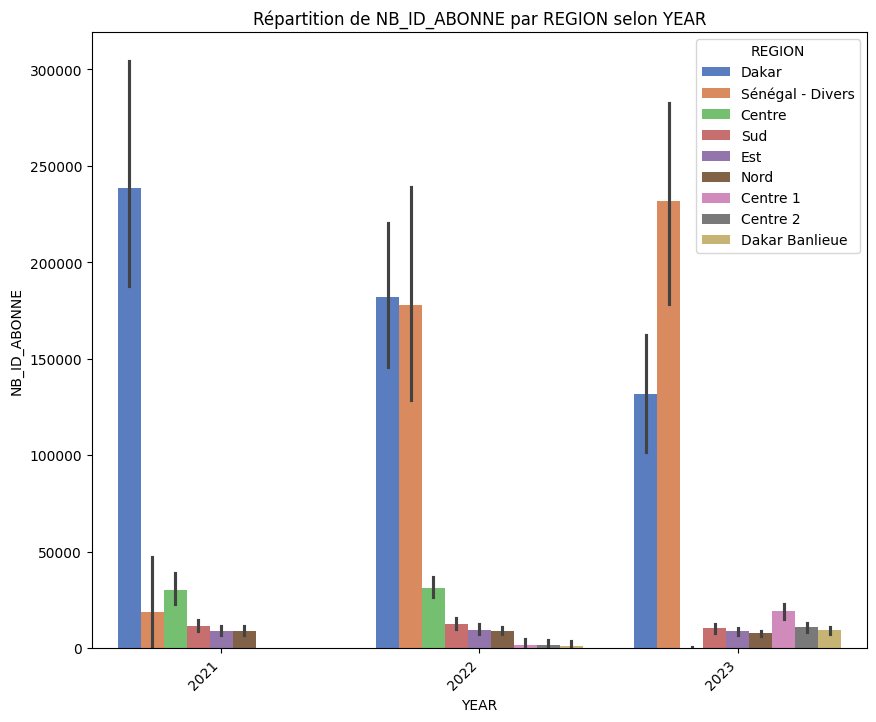

In [180]:
rep_evo_secteurs_year(path_results_antoine)

Différences entre mois 

In [184]:
def rep_evo_secteurs_month(data_path):
    df = file_to_dataframe(data_path + "month_canaldistrib.csv", ',')
    df1 = file_to_dataframe(data_path  + "month_enseigne.csv", ',')
    df2 = file_to_dataframe(data_path + "month_formule.csv", ',')
    df3 = file_to_dataframe(data_path  + "month_moypay.csv", ',')
    df4 = file_to_dataframe(data_path  + "month_region.csv", ',')

    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'CANAL_DISTRIB', through = 'MONTH')
    graph_repartition(df1, value = 'NB_ID_ABONNE', repartition = 'ENSEIGNE', through = 'MONTH')
    graph_repartition(df2, value = 'NB_ID_ABONNE', repartition = 'FORMULE_PREC', through = 'MONTH')
    graph_repartition(df3, value = 'NB_ID_ABONNE', repartition = 'MOYEN_PAIEMENT', through = 'MONTH')
    graph_repartition(df4, value = 'NB_ID_ABONNE', repartition = 'REGION', through = 'MONTH')

    return True

True

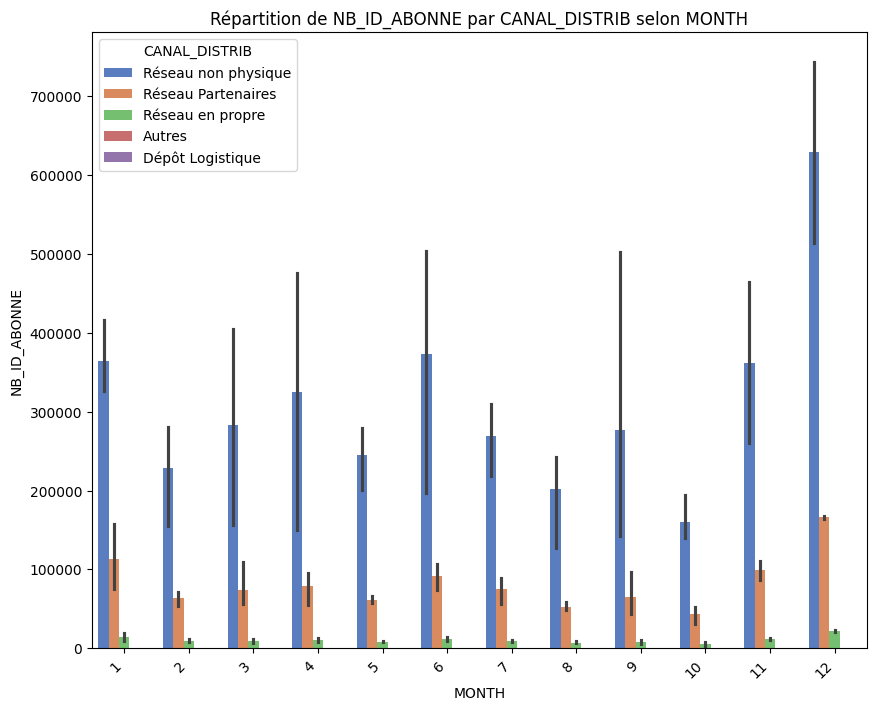

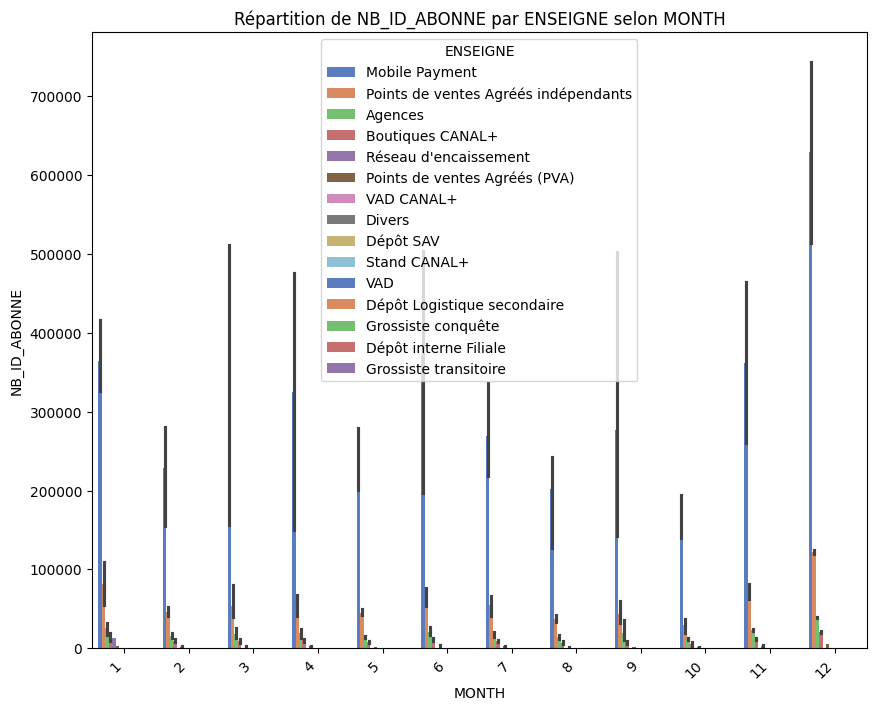

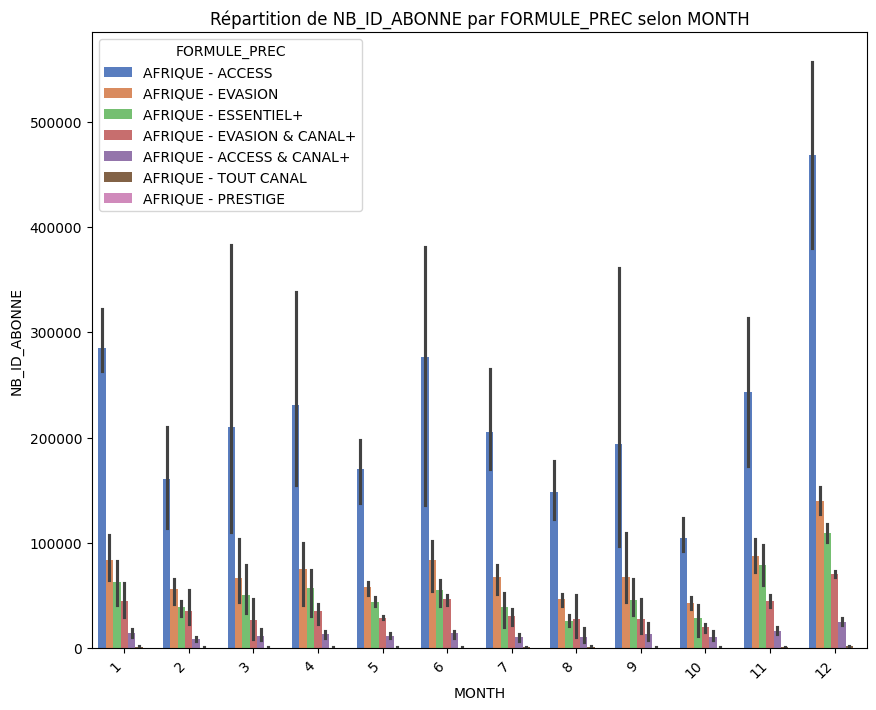

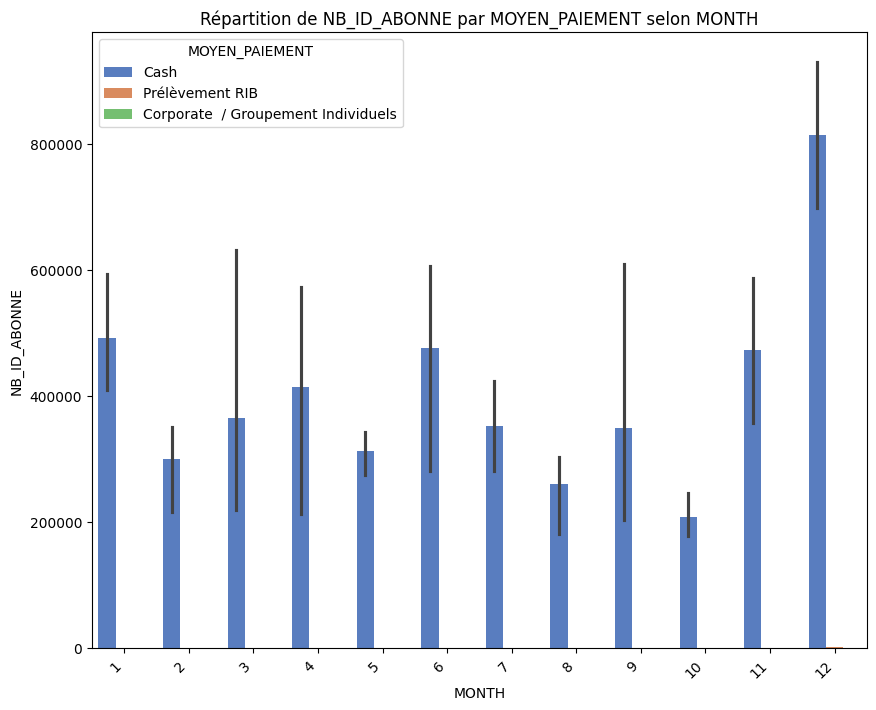

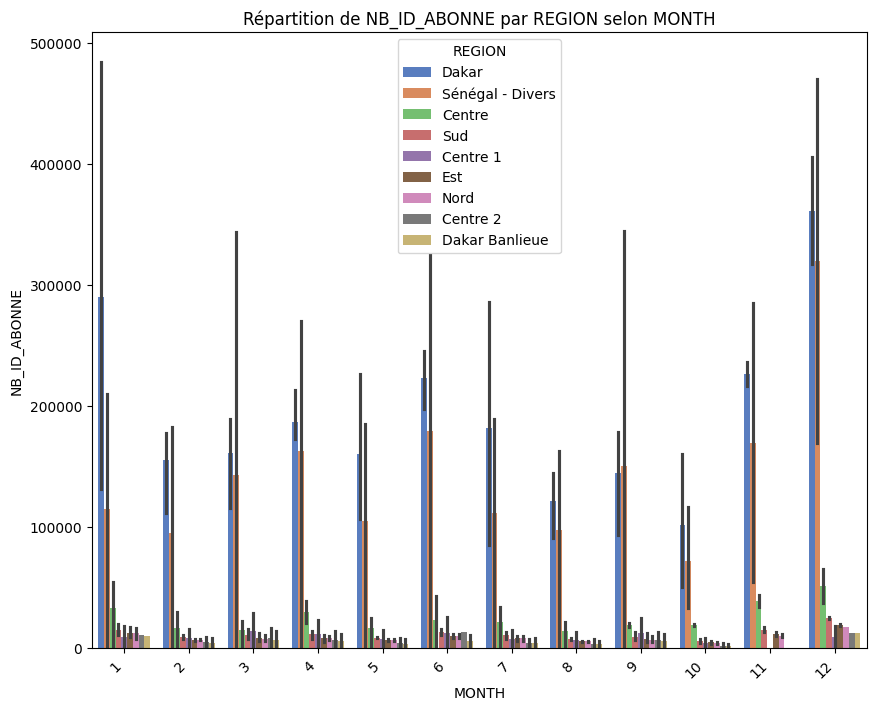

In [185]:
rep_evo_secteurs_month(path_results_antoine)

## 4 / Utilisation des promos au cours du temps

Utilisation des promos au cours des années

In [181]:
def evo_promo(data_path):

    df = file_to_dataframe(data_path + "month_promo.csv", ',')
    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'YEAR')
    graph_repartition(df, value = 'NB_ID_ABONNE', repartition = 'TYPE_PROMON', through = 'MONTH')

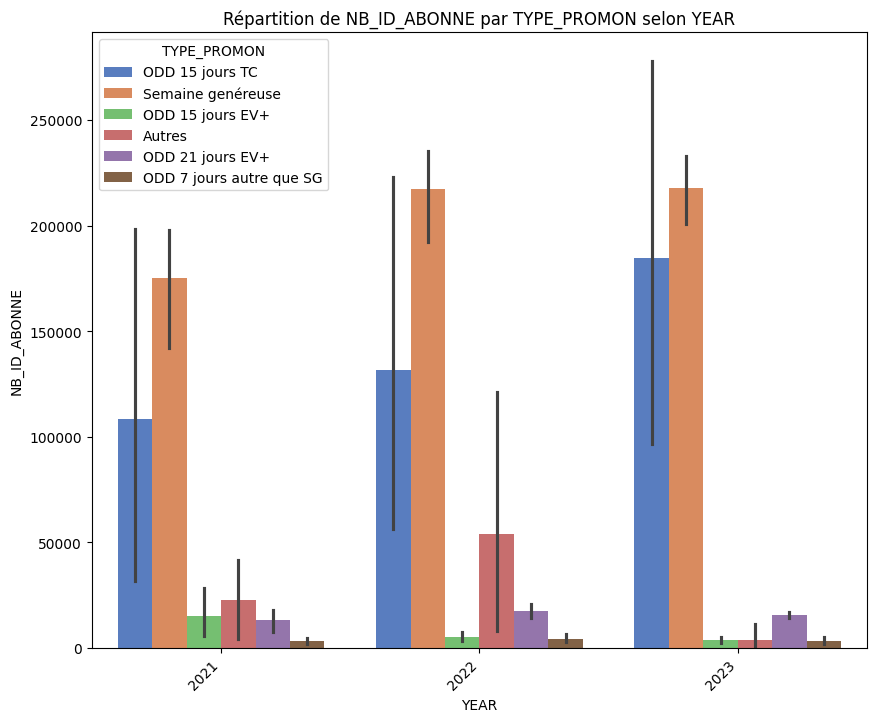

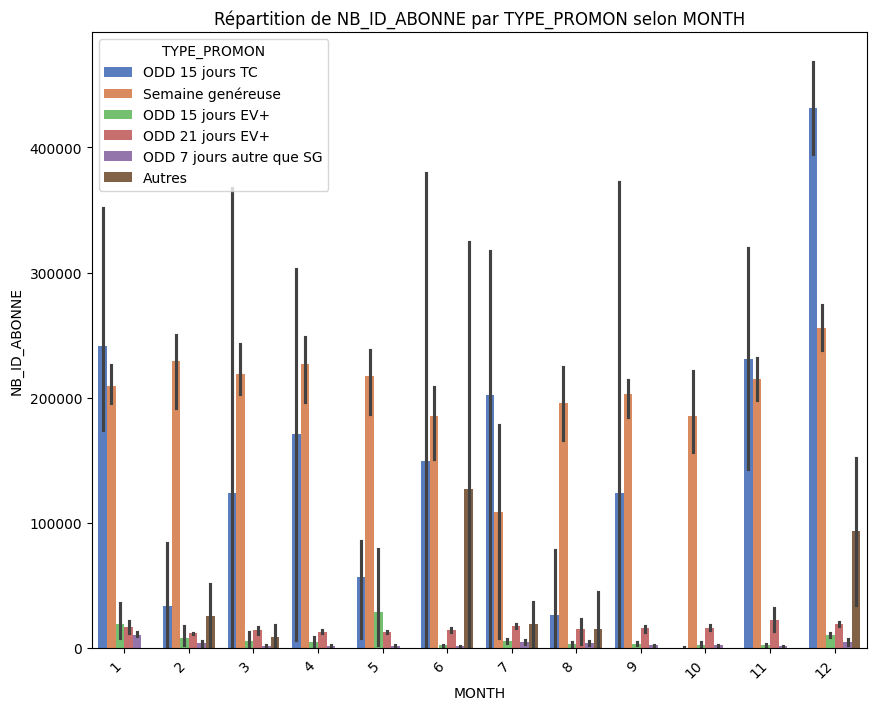

In [182]:
evo_promo(path_results_antoine)

## **5 / Délais de réabonnements**

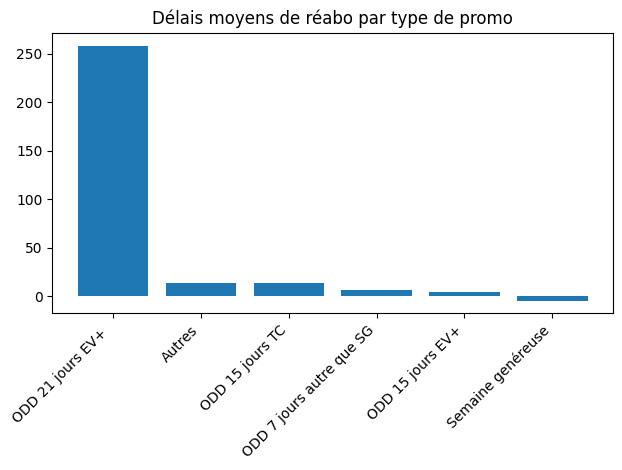

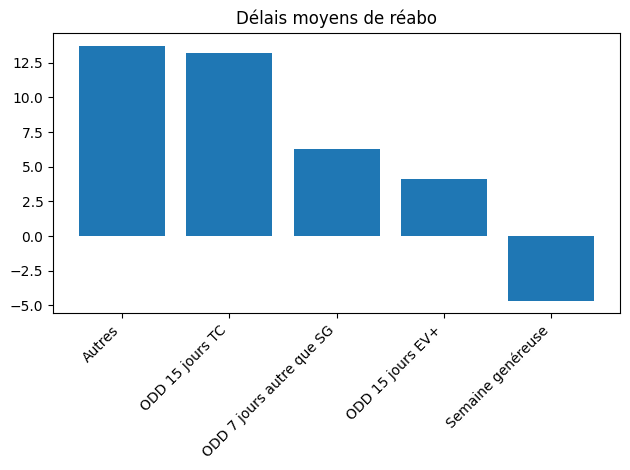

In [183]:
def delai_reabo(data_path):
    df = file_to_dataframe(data_path + "df_mean_time_reabo_promos.csv", ',')
    create_distribution_plot(df, title = 'Délais moyens de réabo par type de promo', label = 0, value = 1, number = True)
    df = df.drop(df.index[0])
    create_distribution_plot(df, title = 'Délais moyens de réabo', label = 0, value = 1, number = True)

delai_reabo(path_antoine)
